## FastANI test

The Average Nucleotide Identity (ANI) is a convenient way to express the similarity of two microbial genomes in a single number. It's the mean nucleotide identity of orthologous gene pairs shared between two genomes. This value is used to delineate species. A typical percentage threshold for species boundary is 95% ANI. It can be calculated by aligning the matching segments and finding the average identity. The alignment can be done quickly with MUMmer (ANIm method) but there are other methods too.

* [FastANI](https://github.com/ParBLiSS/FastANI)
* [High throughput ANI analysis of 90K prokaryotic genomes reveals clear species boundaries](https://www.nature.com/articles/s41467-018-07641-9)
* [pyani](https://github.com/widdowquinn/pyani)

In [1]:
import os, glob, subprocess, time, shutil
import urllib
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
sns.set_context('poster')

In [4]:
asm = pd.read_csv('https://raw.githubusercontent.com/dmnfarrell/mtbdiff/master/mtbdiff/data/mtb_assemblies.csv')

In [5]:
def get_fastani():
    import re
    df = pd.read_csv('fastani.out',sep='\t',names=['query','ref','ident','x','y'])
    df['query'] = df['query'].apply(lambda x: re.split(r"[\./]+",x)[1])
    df['ref'] = df['ref'].apply(lambda x: re.split(r"[\./]+",x)[1])
    x = pd.pivot_table(df,index='query',values='ident',columns=['ref'])
    return x

In [43]:
def run_test(n):
    
    names = list(asm.Assembly_nover)[:n]
    l=[]
    for f in glob.glob('assemblies/*.fa.gz'):
        n=os.path.basename(f).split('.')[0]
        if n in names:
            l.append(f)
    #print (l)
    with open('query.txt', 'w') as infile:
        infile.write('\n'.join(l))
    shutil.copyfile('query.txt','reference.txt')
    cmd = 'fastANI --ql reference.txt --rl query.txt -o fastani.out -t 10'
    st=time.time()
    subprocess.check_output(cmd,shell=True)
    t = time.time()-st    
    #anim = get_fastani()
    return t

times=[]
step=5
n=2
while n<=100:
    t=run_test(n)
    print (n,t)
    times.append((n,t))
    n+=step
    step+=2


2 3.79510235786438
7 9.65285587310791
14 31.336462259292603
23 70.02833247184753
34 142.89112663269043
47 243.07192540168762
62 417.2687249183655
79 664.6098153591156
98 921.8959712982178


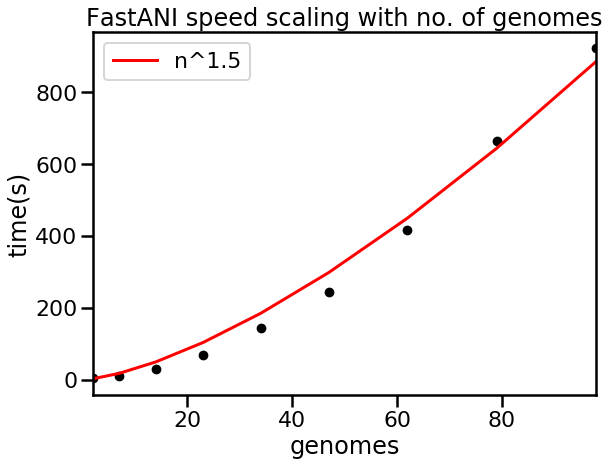

In [162]:
df=pd.DataFrame(times,columns=['genomes','time(s)'])
df['n^1.5'] = df.genomes**1.48
f,ax=plt.subplots(1,1,figsize=(9,7))
df.plot('genomes','time(s)',kind='scatter',ax=ax,s=60,c='black')
df.plot('genomes','n^1.5',c='red',ax=ax)
plt.title('FastANI speed scaling with no. of genomes')
plt.tight_layout()
plt.savefig('fastani_scale.png',dpi=150)

In [157]:
import math
n=200
x=np.zeros(shape=(n,n))
n*(n-1)/2

19900.0

In [156]:
19900*10/60/60

55.27777777777778